# Activity Model

Author: Patricia Ternes


## Table of Contents

* [Modules](#ref-modules)
* [Tree structure](#ref-tree)
* [GIS Data](#ref-gis)
    * [Download an UK Boundary Dataset](#ref-gis-download)
    * [Reading the UK Boundary Dataset](#ref-gis-read)
* [Census Data](#ref-census)
    * [Download the UK Census Data](#ref-census-download)
        * [Tenure Data](#ref-census-download-tenure)
        * [Single family dwellings](#ref-census-download-dwellings)
        * [Accommodation type](#ref-census-download-accommodation)
        * [Workday population](#ref-census-download-workday)

## Modules <a class="anchor" id="ref-modules"></a>

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

## Tree structure <a class="anchor" id="ref-tree"></a>

Create the necessary folder structure

In [2]:
!mkdir data
!mkdir data/gis
!mkdir data/census

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/gis’: File exists
mkdir: cannot create directory ‘data/census’: File exists


In [3]:
!tree -d 

.
└── data
    ├── census
    └── gis

3 directories


## GIS Data <a class="anchor" id="ref-gis"></a>



### Download an UK Boundary Dataset <a class="anchor" id="ref-gis-download"></a>

See gis [README.md](data/gis/README.md) for details

In [4]:
!wget -O data/gis/England_msoa_2011_sgen_clipped.zip https://borders.ukdataservice.ac.uk/ukborders/easy_download/prebuilt/shape/England_msoa_2011_sgen_clipped.zip
!unzip -o data/gis/England_msoa_2011_sgen_clipped.zip -d data/gis
!rm data/gis/England_msoa_2011_sgen_clipped.zip

--2021-06-24 15:45:04--  https://borders.ukdataservice.ac.uk/ukborders/easy_download/prebuilt/shape/England_msoa_2011_sgen_clipped.zip
Resolving borders.ukdataservice.ac.uk (borders.ukdataservice.ac.uk)... 155.245.92.12
Connecting to borders.ukdataservice.ac.uk (borders.ukdataservice.ac.uk)|155.245.92.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2644493 (2.5M) [application/zip]
Saving to: ‘data/gis/England_msoa_2011_sgen_clipped.zip’

100%[======================================>] 2,644,493   3.70MB/s   in 0.7s   

2021-06-24 15:45:05 (3.70 MB/s) - ‘data/gis/England_msoa_2011_sgen_clipped.zip’ saved [2644493/2644493]

Archive:  data/gis/England_msoa_2011_sgen_clipped.zip
  inflating: data/gis/TermsAndConditions.html  
  inflating: data/gis/england_msoa_2011_sgen_clipped.dbf  
  inflating: data/gis/england_msoa_2011_sgen_clipped.prj  
  inflating: data/gis/england_msoa_2011_sgen_clipped.shp  
  inflating: data/gis/england_msoa_2011_sgen_clipped.shx  


### Reading the UK Boundary Dataset <a class="anchor" id="ref-gis-read"></a>

1. variable: `msoa`
2. change the first column name to `MSOA11CD`

In [5]:
msoa_filename = os.path.join("data", "gis", "england_msoa_2011_sgen_clipped.shp")

msoa = gpd.read_file(filename=msoa_filename).set_index('code', drop=True)
msoa.index = msoa.index.rename("MSOA11CD")  # Rename the index (MSOA code) to match column name used later
msoa

,name,geometry
MSOA11CD,,
E02000001,City of London 001,"POLYGON ((532419.592 181998.305, 532746.814 18..."
E02000002,Barking and Dagenham 001,"POLYGON ((548452.001 189024.718, 548235.426 18..."
E02000003,Barking and Dagenham 002,"POLYGON ((548954.500 189063.203, 548874.188 18..."
E02000004,Barking and Dagenham 003,"POLYGON ((551943.813 186027.672, 551670.812 18..."
E02000005,Barking and Dagenham 004,"POLYGON ((549145.624 187383.875, 549128.657 18..."
...,...,...
E02006930,Greenwich 037,"POLYGON ((540659.000 178728.000, 540583.276 17..."
E02006931,Greenwich 038,"POLYGON ((538774.161 177841.174, 538834.755 17..."
E02006932,Liverpool 060,"POLYGON ((334590.294 391107.590, 334777.949 39..."


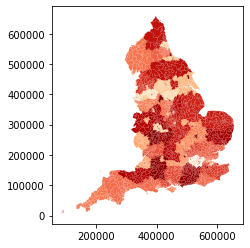

In [6]:
msoa.plot(cmap='OrRd')

## Census Data <a class="anchor" id="ref-census"></a>

### Download the UK Census Data <a class="anchor" id="ref-census-download"></a>

See census [README.md](data/census/README.md) for details.

#### Tenure Data <a class="anchor" id="ref-census-download-tenure"></a>

In [7]:
url = 'https://www.nomisweb.co.uk/api/v01/dataset/nm_537_1.bulk.csv?time=latest&measures=20100&rural_urban=total&geography=TYPE297'
myfile = requests.get(url)
open('data/census/tenure-households.csv', 'wb').write(myfile.content)

694379

#### Single family dwellings <a class="anchor" id="ref-census-download-dwellings"></a>

In [8]:
url = 'https://www.nomisweb.co.uk/api/v01/dataset/nm_516_1.bulk.csv?time=latest&measures=20100&rural_urban=total&geography=TYPE297'
myfile = requests.get(url)
open('data/census/household-type.csv', 'wb').write(myfile.content)

628674

#### Accommodation type <a class="anchor" id="ref-census-download-accommodation"></a>

In [9]:
url = 'https://www.nomisweb.co.uk/api/v01/dataset/nm_534_1.bulk.csv?time=latest&measures=20100&rural_urban=total&geography=TYPE297'
myfile = requests.get(url)
open('data/census/accommodation_type-households.csv', 'wb').write(myfile.content)

655990

#### Workday population<a class="anchor" id="ref-census-download-workday"></a>

In [10]:
url = 'https://www.nomisweb.co.uk/api/v01/dataset/nm_942_1.bulk.csv?time=latest&measures=20100&geography=TYPE297'
myfile = requests.get(url)
open('data/census/economic_activity_workday.csv', 'wb').write(myfile.content)

732471